# R Client Terrabrasilis Analytics API

**terrabrasilisAnalyticsAPI** is an R client package for Terrabrasilis Analytics API. 

## Getting started

Installing and loading terrabrasilisAnalyticsAPI package in R


In [23]:
# devtools::install_github("terrabrasilis/terrabrasilisAnalyticsAPI") # github group name is terrabrasilis
options(warn=-1) 
options(scipen=999) # disable scientific notation
options(repr.plot.width = 14, repr.plot.height = 9, repr.plot.res = 200)
library(terrabrasilisAnalyticsAPI) # R package name is terrabrasilisAnalyticsAPI
library(dplyr)
library(ggplot2) 

Initialize Terrabrasilis Analytics API path variable

In [3]:
apiPath <- "https://terrabrasilis.dpi.inpe.br/dashboard/api/v1/redis-cli/"
apiPath

[1] "https://terrabrasilis.dpi.inpe.br/dashboard/api/v1/redis-cli/"

Define calls for application identifiers listing. From that information, it is possible then to make specific requests to other API end-points.


In [4]:
appIdentifier <- list_datasets(apiPath)
appIdentifier

[1] "prodes_cerrado"      "prodes_amazon"       "prodes_legal_amazon"
[4] "prodes_pampa"        "prodes_pantanal"

With that in mind, let's create a prodesCerrado variable.

In [5]:
prodesCerrado <- appIdentifier[1]
prodesCerrado

[1] "prodes_cerrado"

The first question that reminds us to ask to the API is: which periods do Prodes Cerrado contains?

In [6]:
periods <- list_periods(apiPath, prodesCerrado)
periods

startDate.year,startDate.month,startDate.day,endDate.year,endDate.month,endDate.day
<int>,<int>,<int>,<int>,<int>,<int>
2000,8,1,2002,7,31
2002,8,1,2004,7,31
2004,8,1,2006,7,31
2006,8,1,2008,7,31
2008,8,1,2010,7,31
2010,8,1,2012,7,31
2012,8,1,2013,7,31
2013,8,1,2014,7,31
2014,8,1,2015,7,31


Users can also ask to the API, for example, which classes do PRODES Cerrado contains?

In [7]:
classes <- list_classes(apiPath, prodesCerrado)
classes

id,name,description
<int>,<chr>,<chr>
1,deforestation,It is the process of complete and permanent disappearance of forests


In this case, it is just one class designating deforestation label. Other thematic mapping projects, however, would contain more than one class or even the same class name.

Besides responding which classes and periods, users might ask which local of interests (lois) as states, municipalities, conservation units, indigeneous areas, and Landsat Path/Row, the API provides. 

In [8]:
locals <- list_locals(apiPath, prodesCerrado)
locals

gid,name
<int>,<chr>
1,uf
2,mun
3,consunit
4,indi


Nevertheless, locals are not considered the final granularity since each state, municipality, conservation unit, indigeneous areas, and Landsat Path/Row also contain small-scale local of interests.


In [9]:
localOfInterest <- list_local_of_interests(apiPath, prodesCerrado)
localOfInterest[450:458,] # select lines from 450 to 458

gid,loiname,codibge,loi
<int>,<chr>,<int>,<dbl>
2276,SÃO SEBASTIÃO DO RIO PRETO_MINAS GERAIS,3164803,2
2152,CARNEIRINHO_MINAS GERAIS,3114550,2
2040,TRÊS LAGOAS_MATO GROSSO DO SUL,5008305,2
1833,RECURSOLÂNDIA_TOCANTINS,1718501,2
2631,MURICILÂNDIA_TOCANTINS,1713957,2
2385,LUPÉRCIO_SÃO PAULO,3527801,2
2025,NOVA ANDRADINA_MATO GROSSO DO SUL,5006200,2
1742,MAIRIPOTABA_GOIÁS,5212600,2
1682,SÃO JOSÉ DO RIO PRETO_SÃO PAULO,3549805,2


It is possible to filter loinames by one specific loi such as UF.

In [10]:
loiUF = dplyr::filter(locals, grepl("uf", name))$gid
loinamesByLoi <- list_localOfInterestByLocal(apiPath, prodesCerrado, loiUF)
loinamesByLoi

gid,loiname
<int>,<chr>
1185,BAHIA
1186,DISTRITO FEDERAL
1187,GOIÁS
1188,MARANHÃO
1189,MATO GROSSO
1190,MATO GROSSO DO SUL
1191,MINAS GERAIS
1192,PARÁ
1193,PIAUÍ


In order to fit data into governmental needs, we also considered filters for each data recognized that as type in the data API call.

In [11]:
filters <- list_filters(apiPath, prodesCerrado)
filters

id,type
<int>,<chr>
1,fid_area >= 0.0625
2,fid_area >= 0.01


All this data is used to gather specific thematic map area values produced by government agencies such as the National Institute for Space Research. In this example, users are able to acquire data by loiname, that is, the function accepts as parameters, the class name and loiname gid as well.

In [12]:
loinamesByLoi[10,] # loiname

gid,loiname
<int>,<chr>
1194,SÃO PAULO


In [13]:
data <- get_dataByLocalOfInterest(apiPath, prodesCerrado, 
                                  classes$name, loinamesByLoi[10,]$gid) %>% 
    dplyr::filter(.,type==2) %>% 
    dplyr::filter(.,endDate.year!=2000) %>% 
    dplyr::select(name, clazz, startDate.year, endDate.year, area)

data

New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



name,clazz,startDate.year,endDate.year,area
<chr>,<chr>,<int>,<int>,<dbl>
PRODES CERRADO,deforestation,2000,2002,365.304422
PRODES CERRADO,deforestation,2002,2004,419.905551
PRODES CERRADO,deforestation,2004,2006,428.513327
PRODES CERRADO,deforestation,2006,2008,112.622299
PRODES CERRADO,deforestation,2008,2010,144.988424
PRODES CERRADO,deforestation,2010,2012,48.165322
PRODES CERRADO,deforestation,2012,2013,43.438061
PRODES CERRADO,deforestation,2013,2014,49.740495
PRODES CERRADO,deforestation,2014,2015,25.106844


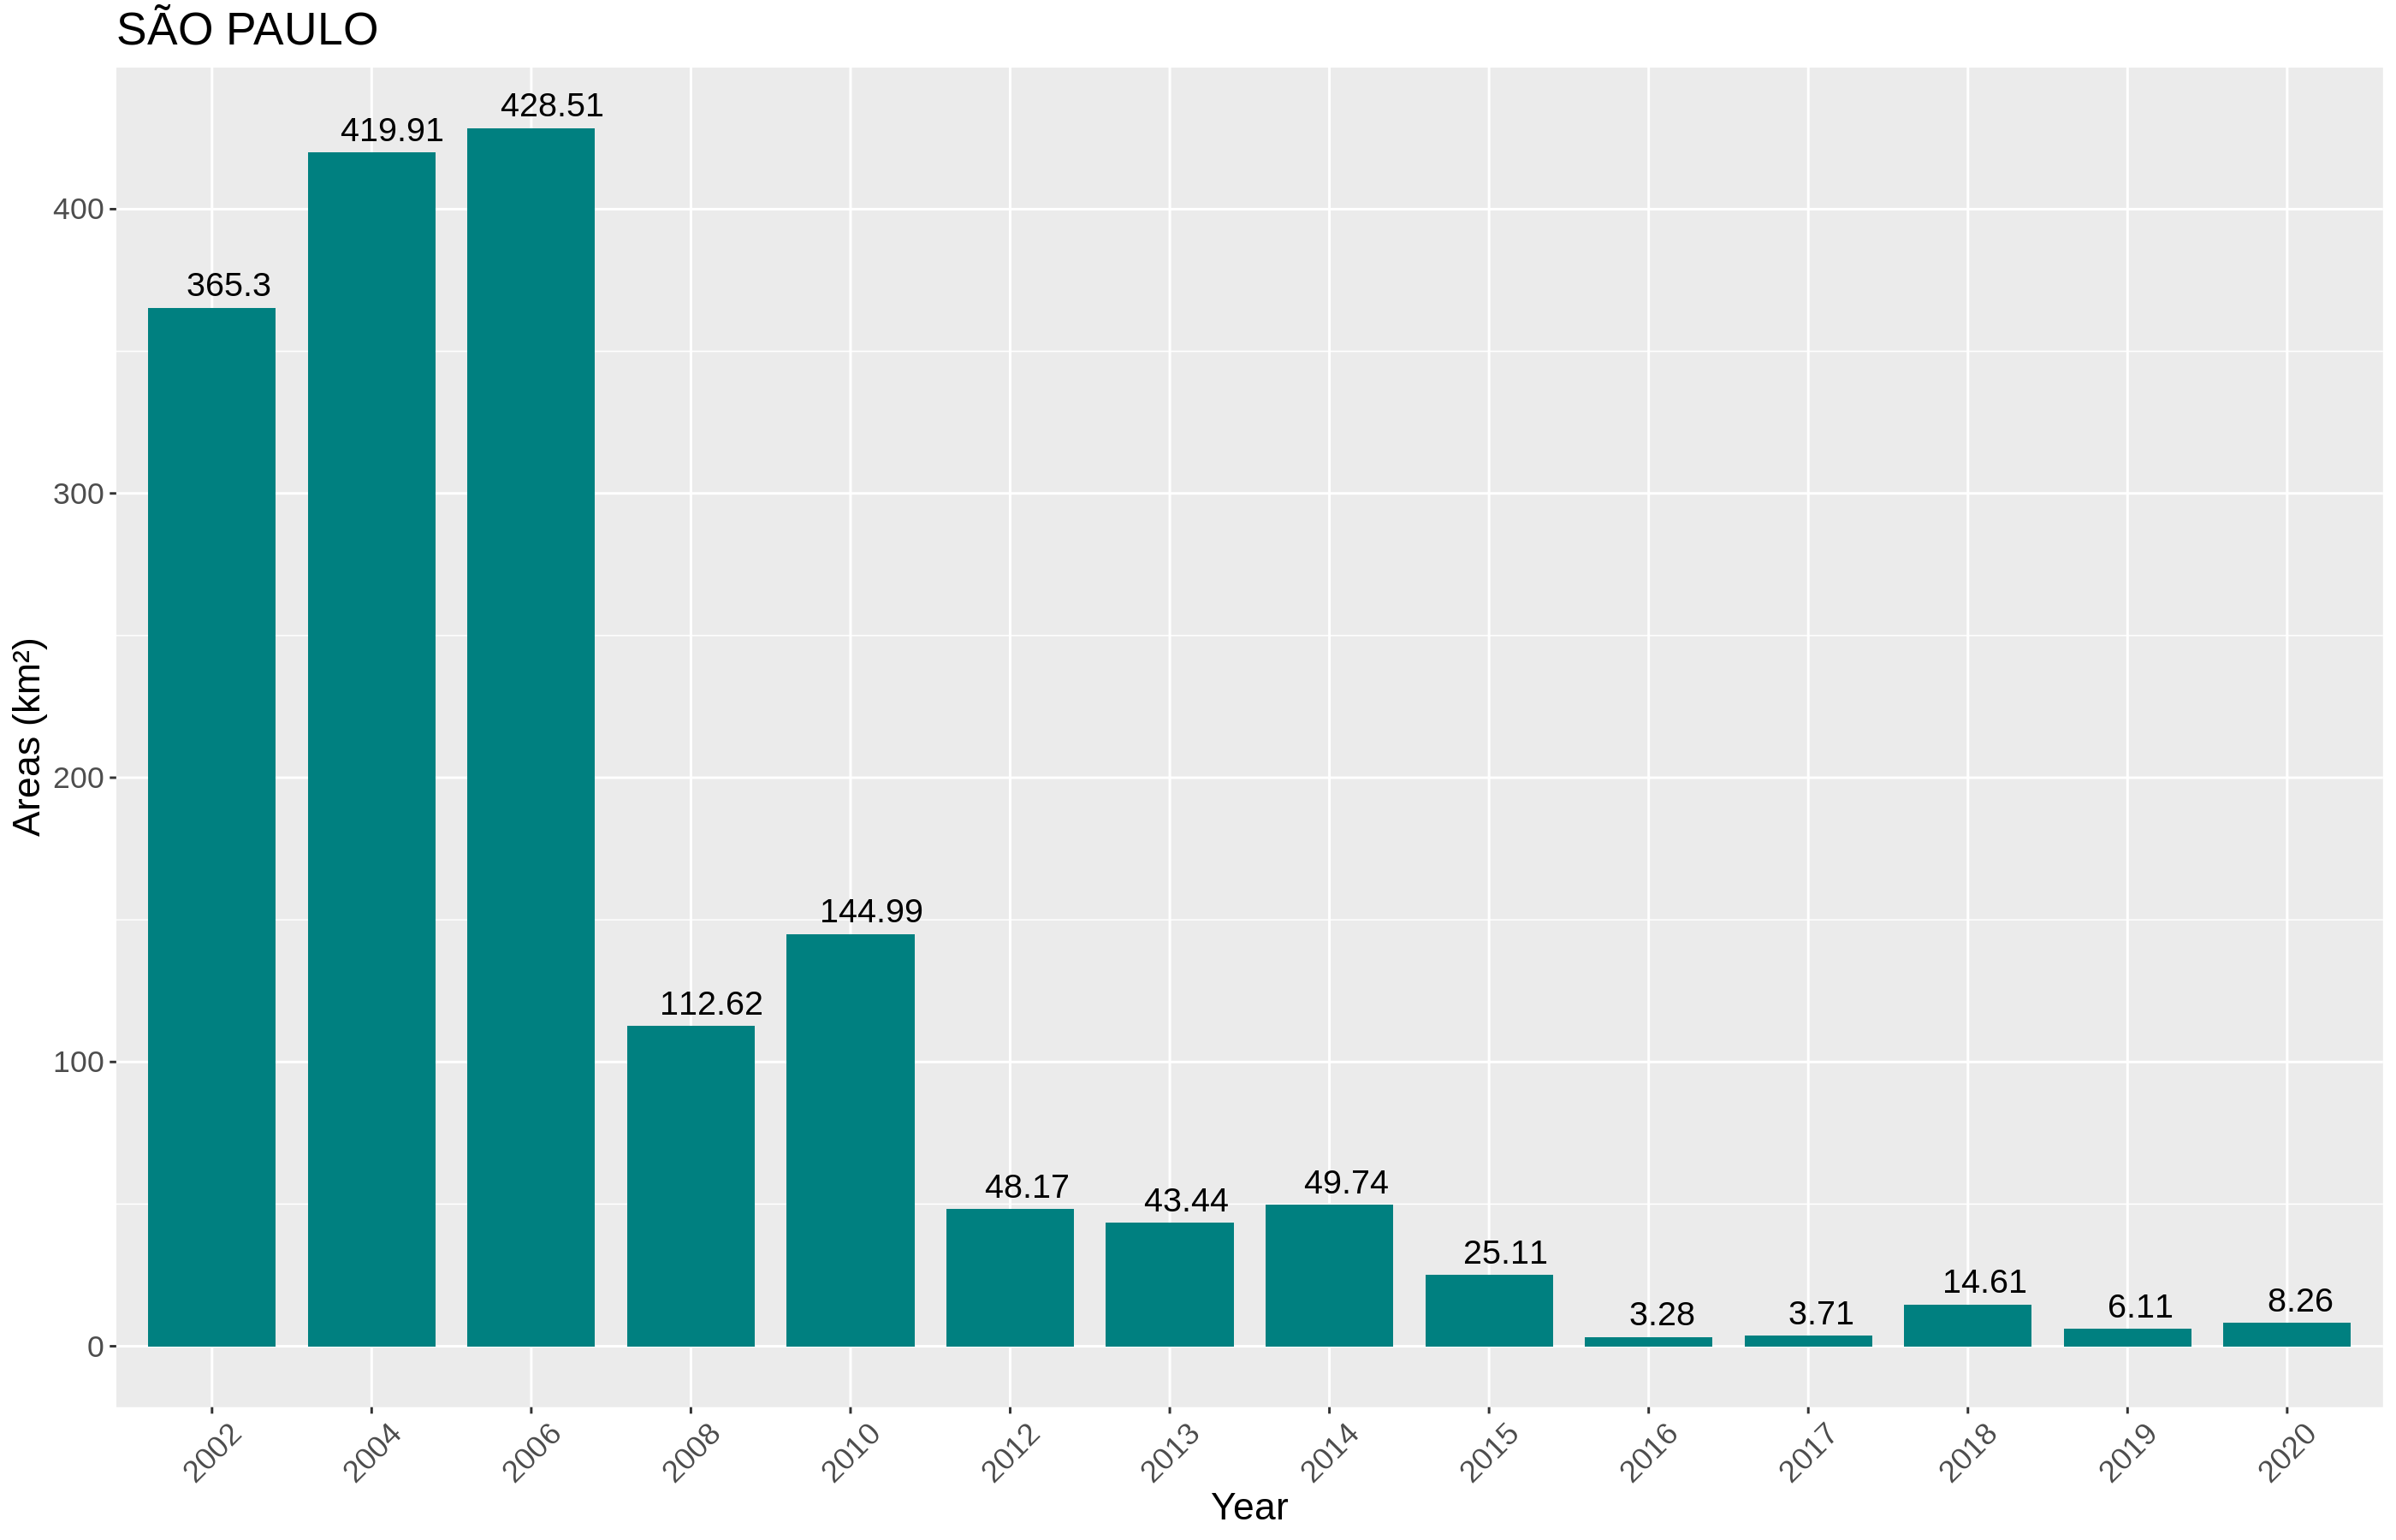

In [14]:
f1 <- data

ggplot(f1, aes(x=as.factor(endDate.year), y=area, fill=clazz)) + 
  geom_text(aes(label=as.numeric(round(f1$area, 2))), vjust=-0.5, hjust=0.3, size = 5) + # angle = 75,
  geom_bar(stat = "identity", width = 0.8, fill = "#008080") +
  scale_x_discrete("Year", labels = as.character(f1$endDate.year), breaks = f1$endDate.year) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") + 
  labs(title = loinamesByLoi[10,]$loiname) + labs(fill = "class")

The same query can be performed using get data by parameters function. In this case, users pass also as parameters a start and end data. Unlikely the previous call, users will not receive all the available timeline as soon as they really desire.

In [15]:
data1 <- get_dataByParameters(apiPath, prodesCerrado, classes$name, 
                              loinamesByLoi[10,]$gid, "2012-01-01", "2020-12-31") %>% 
  dplyr::filter(.,type==2) %>% 
  dplyr::filter(.,endDate.year!=2000) %>% 
  dplyr::select(name, clazz, startDate.year, endDate.year, area)

data1

New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



name,clazz,startDate.year,endDate.year,area
<chr>,<chr>,<int>,<int>,<dbl>
PRODES CERRADO,deforestation,2012,2013,43.438061
PRODES CERRADO,deforestation,2013,2014,49.740495
PRODES CERRADO,deforestation,2014,2015,25.106844
PRODES CERRADO,deforestation,2015,2016,3.275794
PRODES CERRADO,deforestation,2016,2017,3.706419
PRODES CERRADO,deforestation,2017,2018,14.607230
PRODES CERRADO,deforestation,2018,2019,6.113063
PRODES CERRADO,deforestation,2019,2020,8.259873


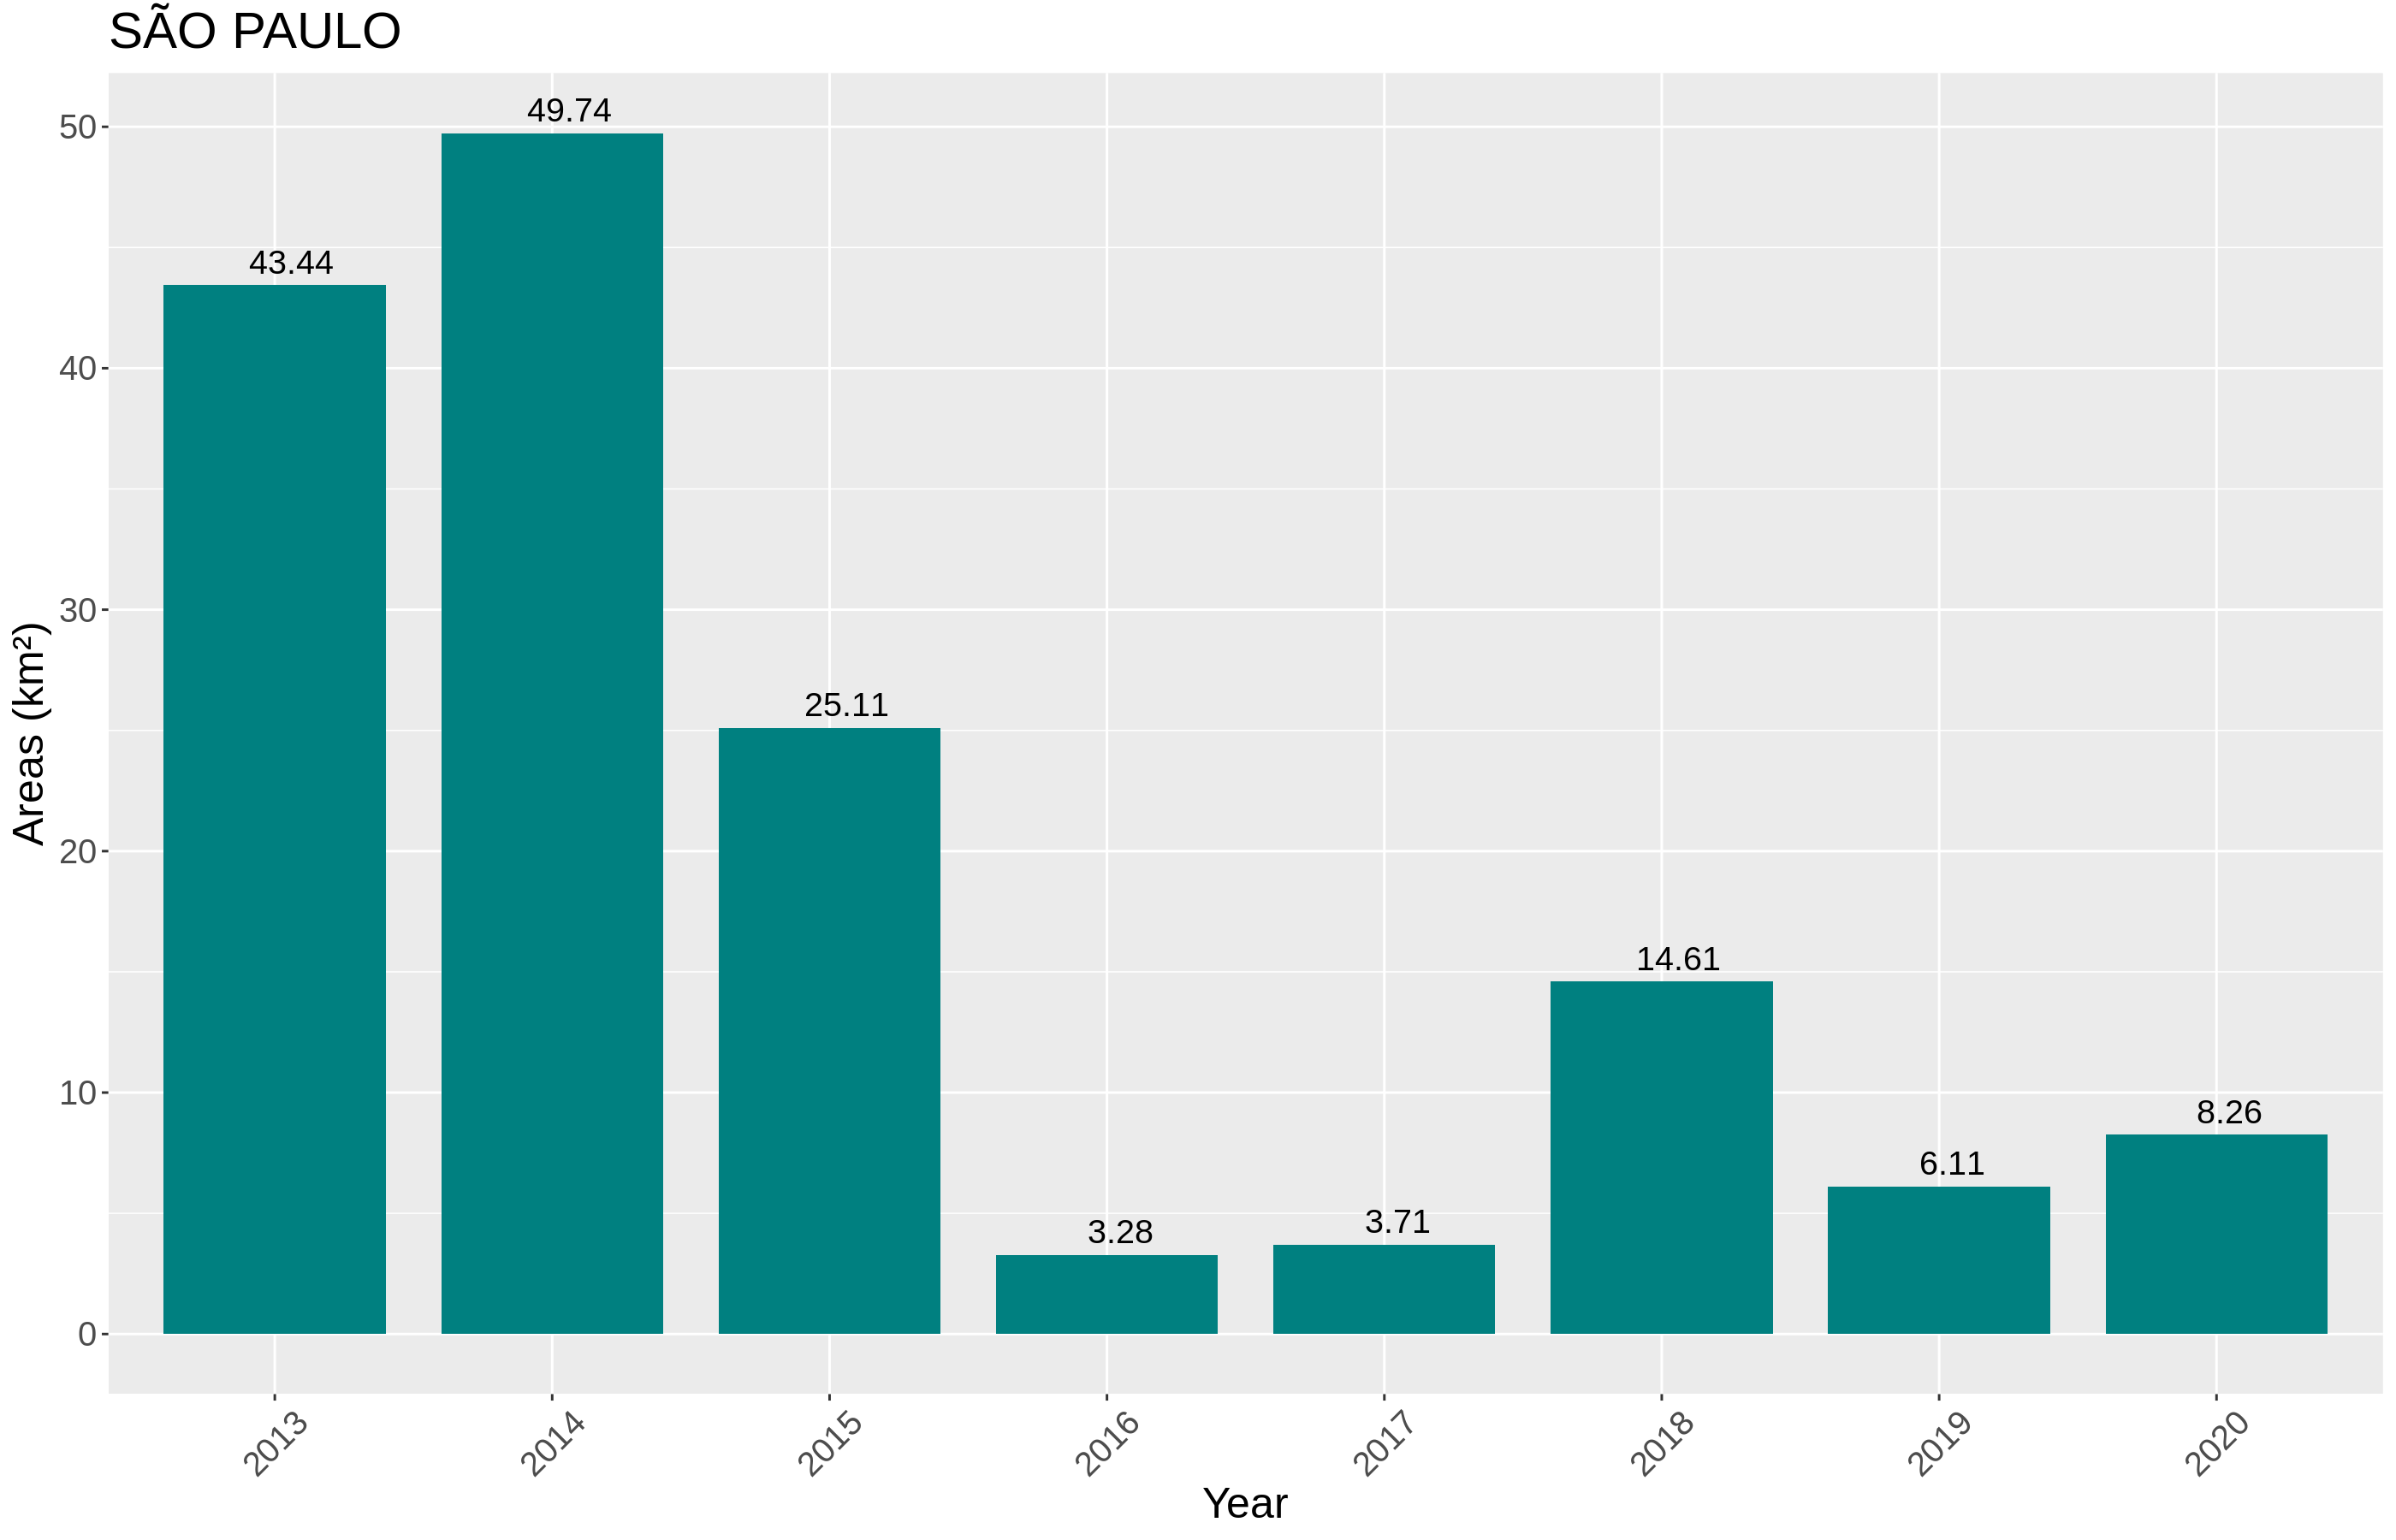

In [16]:
f11 <- data1

ggplot(f11, aes(x=as.factor(endDate.year), y=area, fill=clazz)) + 
  geom_text(aes(label=as.numeric(round(f11$area, 2))), vjust=-0.5, hjust=0.3, size = 5) +
  geom_bar(stat = "identity", width = 0.8, fill = "#008080") +
  scale_x_discrete("Year", labels = as.character(f11$endDate.year), breaks = f11$endDate.year) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=18)) +
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") + 
  labs(title = loinamesByLoi[10,]$loiname) + labs(fill = "class")

Compare with SÃO PAULO https://terrabrasilis.dpi.inpe.br/app/dashboard/deforestation/biomes/cerrado/increments

In this example, users are able to acquire data for all loinames, for this, each loiname was mapped

In [17]:
# get data from all loinames from one specific loi
all <- NULL
for (i in loinamesByLoi$gid) {
  cat(i, "\n")
  data <- get_dataByLocalOfInterest(apiPath = apiPath, appIdentifier = prodesCerrado, class = classes$name, loiname = i)
  all <- plyr::rbind.fill(all, data)
}

#all$loi...1 <- ifelse(is.na(all$loi...1), all$loi, all$loi...1)
#all$loiname...2 <- ifelse(is.na(all$loiname...2), all$loiname, all$loiname...2)
#all <- dplyr::select(all, -loi, -loiname)
head(all)

1185 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1186 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1187 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1188 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1189 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1190 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1191 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1192 
1193 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1194 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1195 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1196 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



1197 


New names:
* loi -> loi...1
* loiname -> loiname...2
* areas -> areas...3
* loi -> loi...4
* loiname -> loiname...5
* ...



,name,clazz,startDate.year,startDate.month,startDate.day,endDate.year,endDate.month,endDate.day,loi,loiname,type,area
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,PRODES CERRADO,deforestation,2000,8,1,2002,7,31,1,1185,1,4308.760
2,PRODES CERRADO,deforestation,2000,8,1,2002,7,31,1,1185,2,4570.164
3,PRODES CERRADO,deforestation,2002,8,1,2004,7,31,1,1185,1,5075.428
4,PRODES CERRADO,deforestation,2002,8,1,2004,7,31,1,1185,2,5400.110
5,PRODES CERRADO,deforestation,2004,8,1,2006,7,31,1,1185,1,3305.845
6,PRODES CERRADO,deforestation,2004,8,1,2006,7,31,1,1185,2,3599.672


In [18]:
# define own colors
myCol = c("pink1", "violet", "slateblue1", "purple", "turquoise4", "skyblue", "steelblue", 
          "orange", "red2", "yellowgreen", "tan3", "brown", "grey30")

# select all years different of 2000
allStd <- all[all$type == 2 & all$endDate.year != 2000,]

# define names in legend
legendNames <- unique(factor(allStd$loiname))
names(legendNames) <- loinamesByLoi$loiname

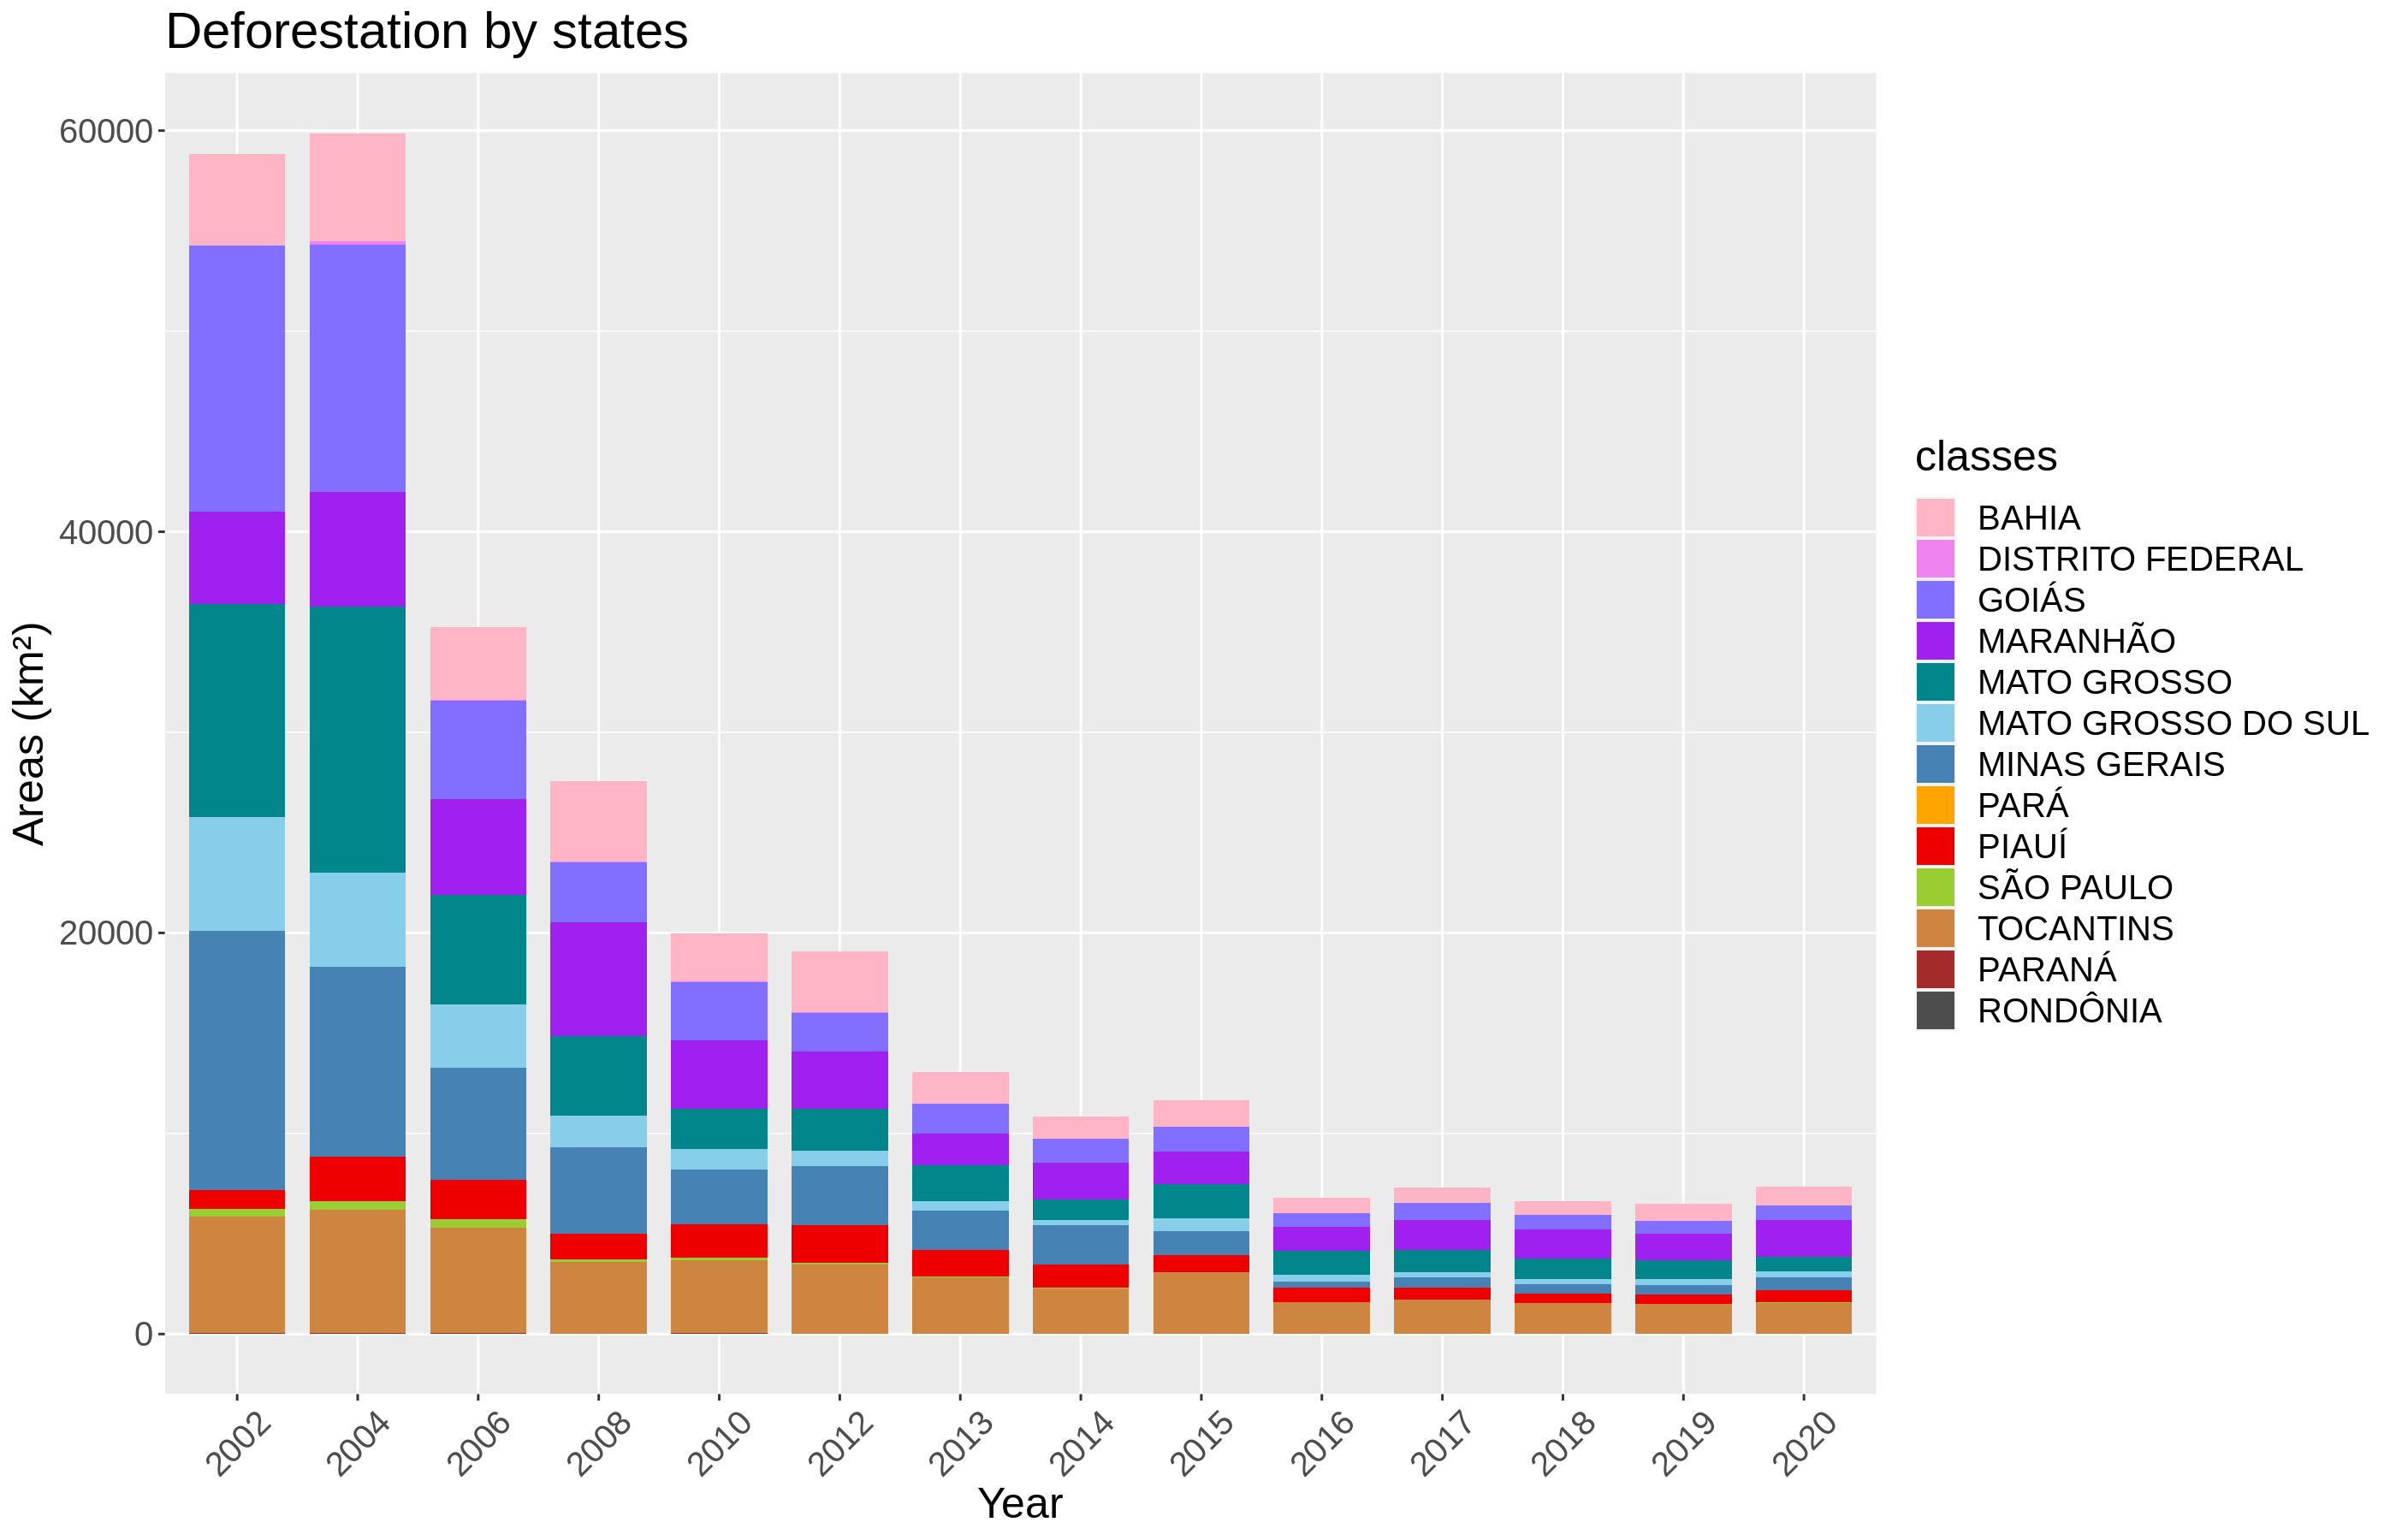

In [19]:
# plot data set by states
ggplot(allStd, aes(x=as.factor(endDate.year), y=area, fill=factor(loiname))) + 
  geom_bar(stat = "identity", width = 0.8) +
  scale_x_discrete("Year", labels = as.character(allStd$endDate.year), 
                   breaks = allStd$endDate.year) +
  scale_fill_manual(values=myCol, labels = names(legendNames)) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=18)) +
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") + 
  labs(title = "Deforestation by states") + labs(fill = "classes")

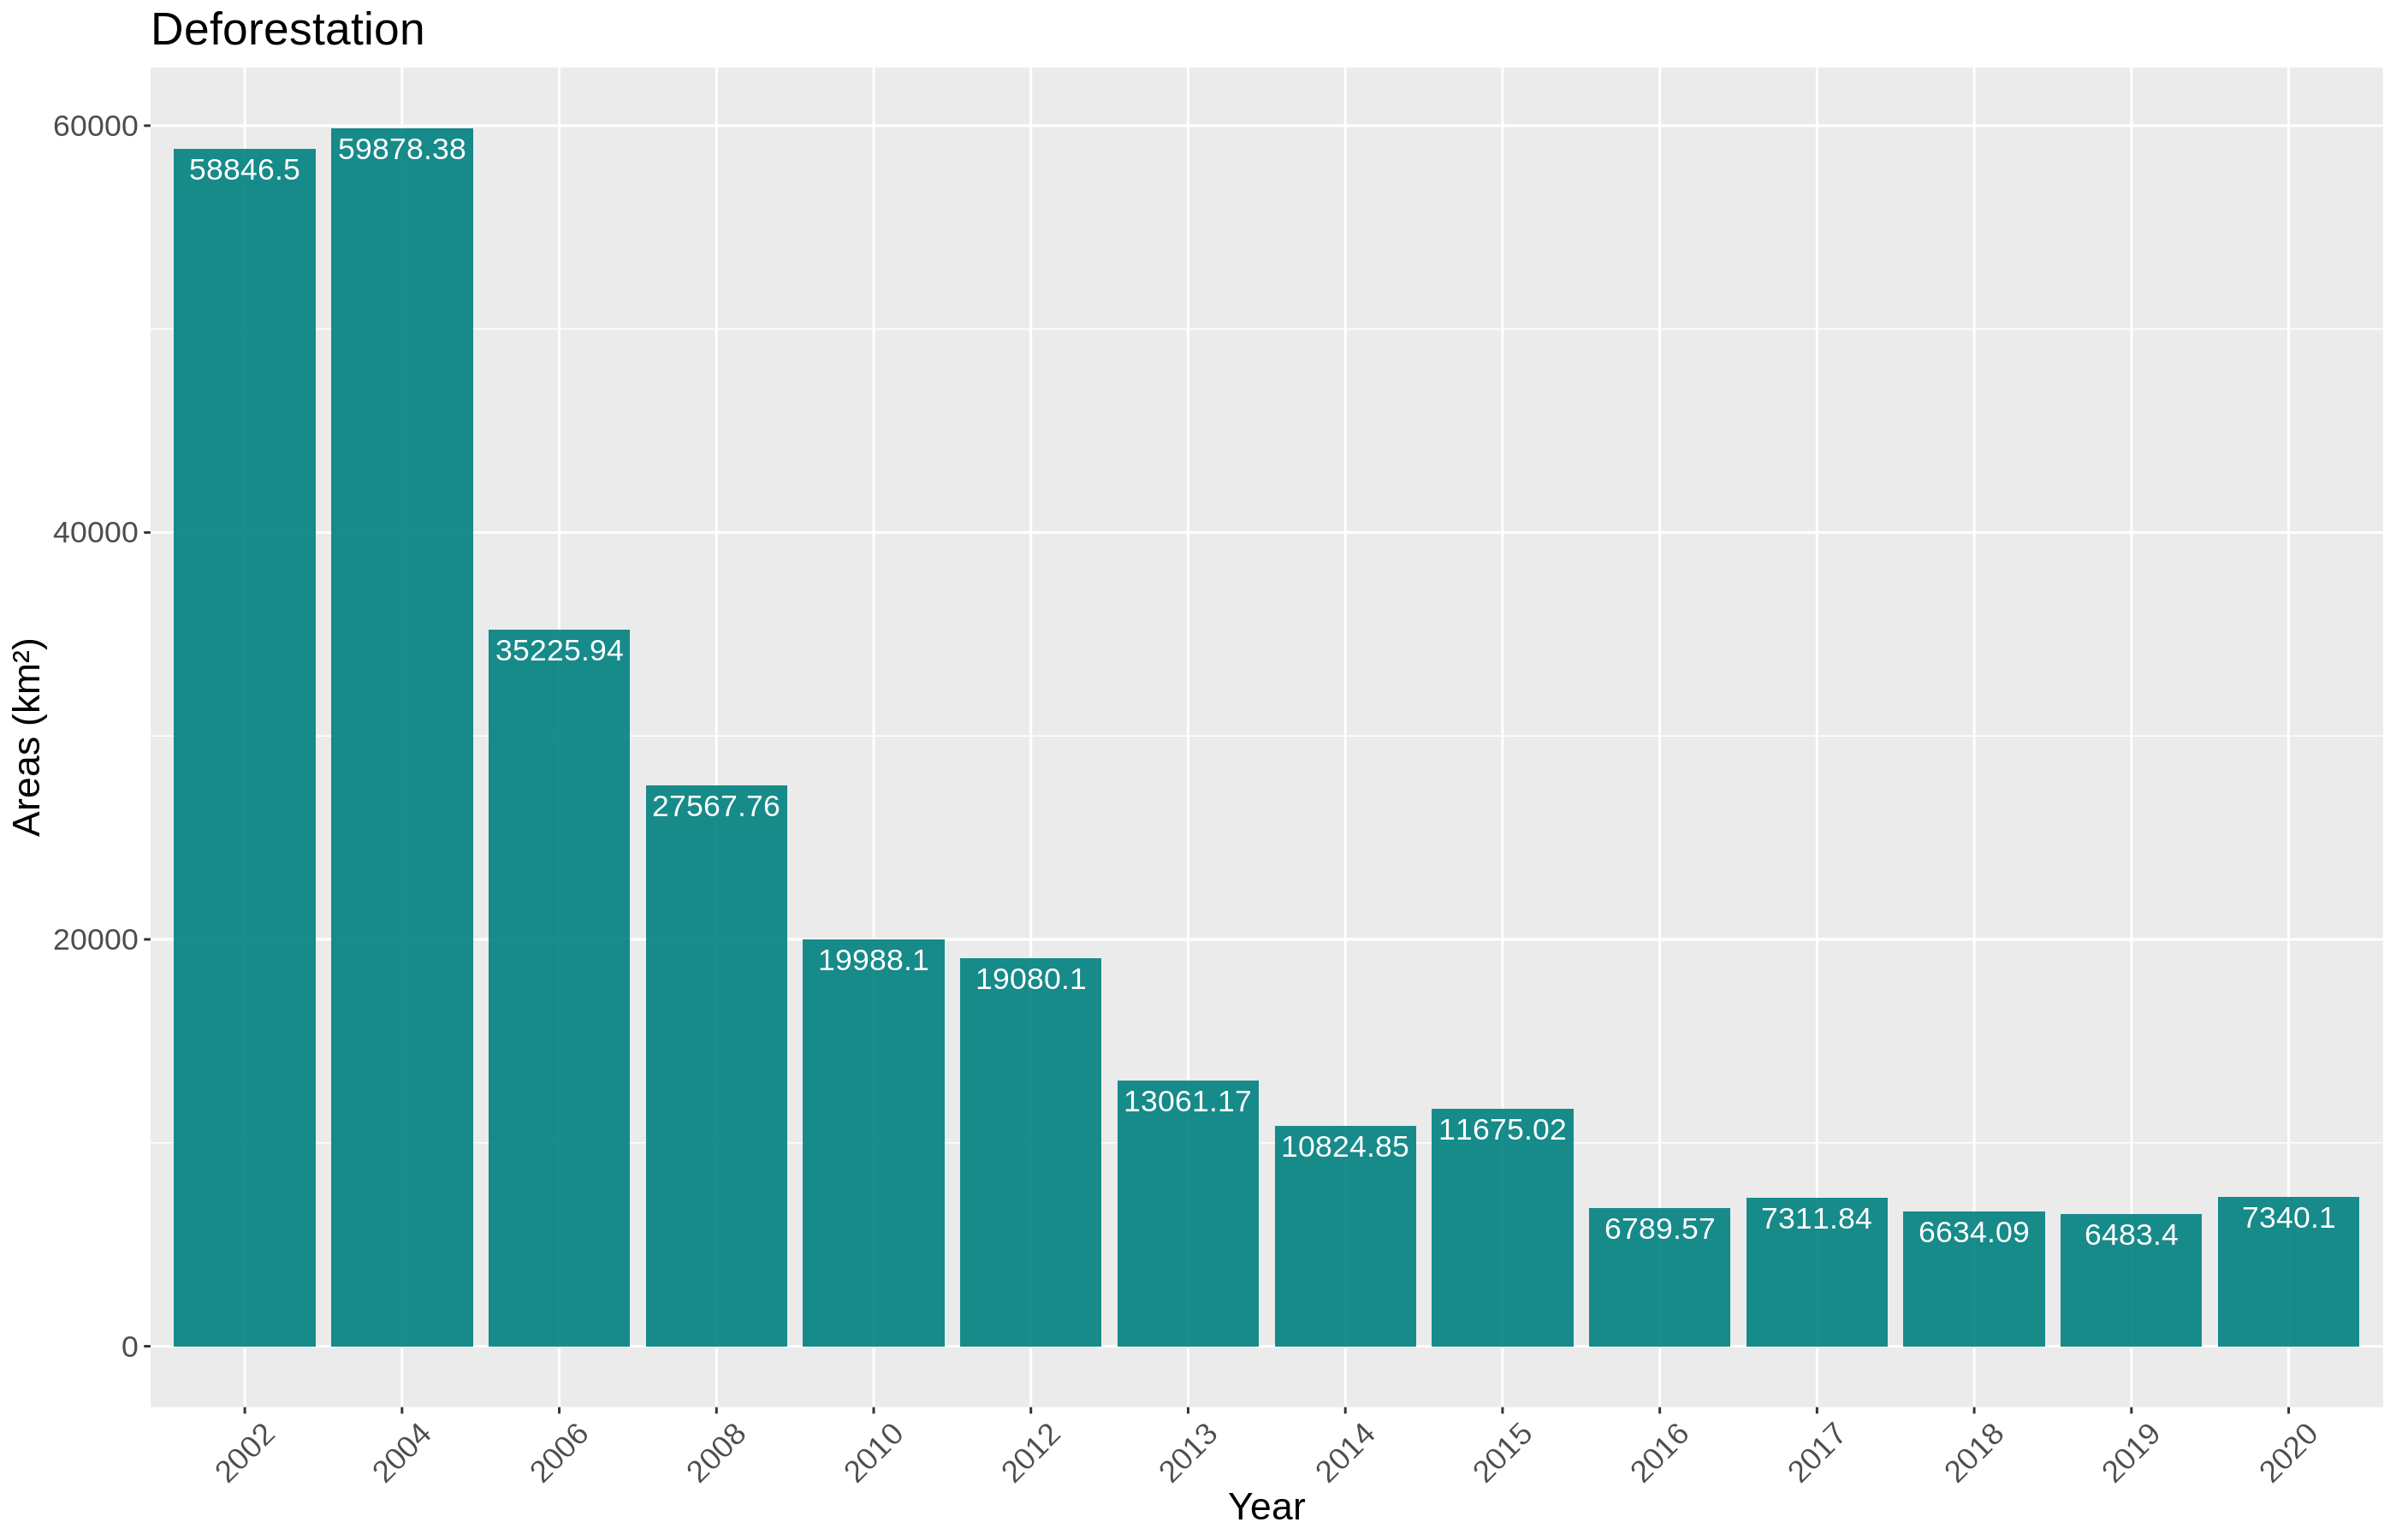

In [20]:
# plot data set complete
ggplot(allStd, aes(x=factor(reorder(endDate.year, loiname)), y=area)) +  
  geom_bar(stat = "identity", width = 0.9, fill = "#008080", alpha = 0.9) +
  stat_summary(
    aes(label = stat(round(y, 2))), fun.y = 'sum', geom = 'text', col = 'white', vjust = 1.5,  size = 4.5
  ) + 
  scale_x_discrete("Year", labels = as.character(allStd$endDate.year), 
                   breaks = allStd$endDate.year) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") +
  labs(title = "Deforestation")

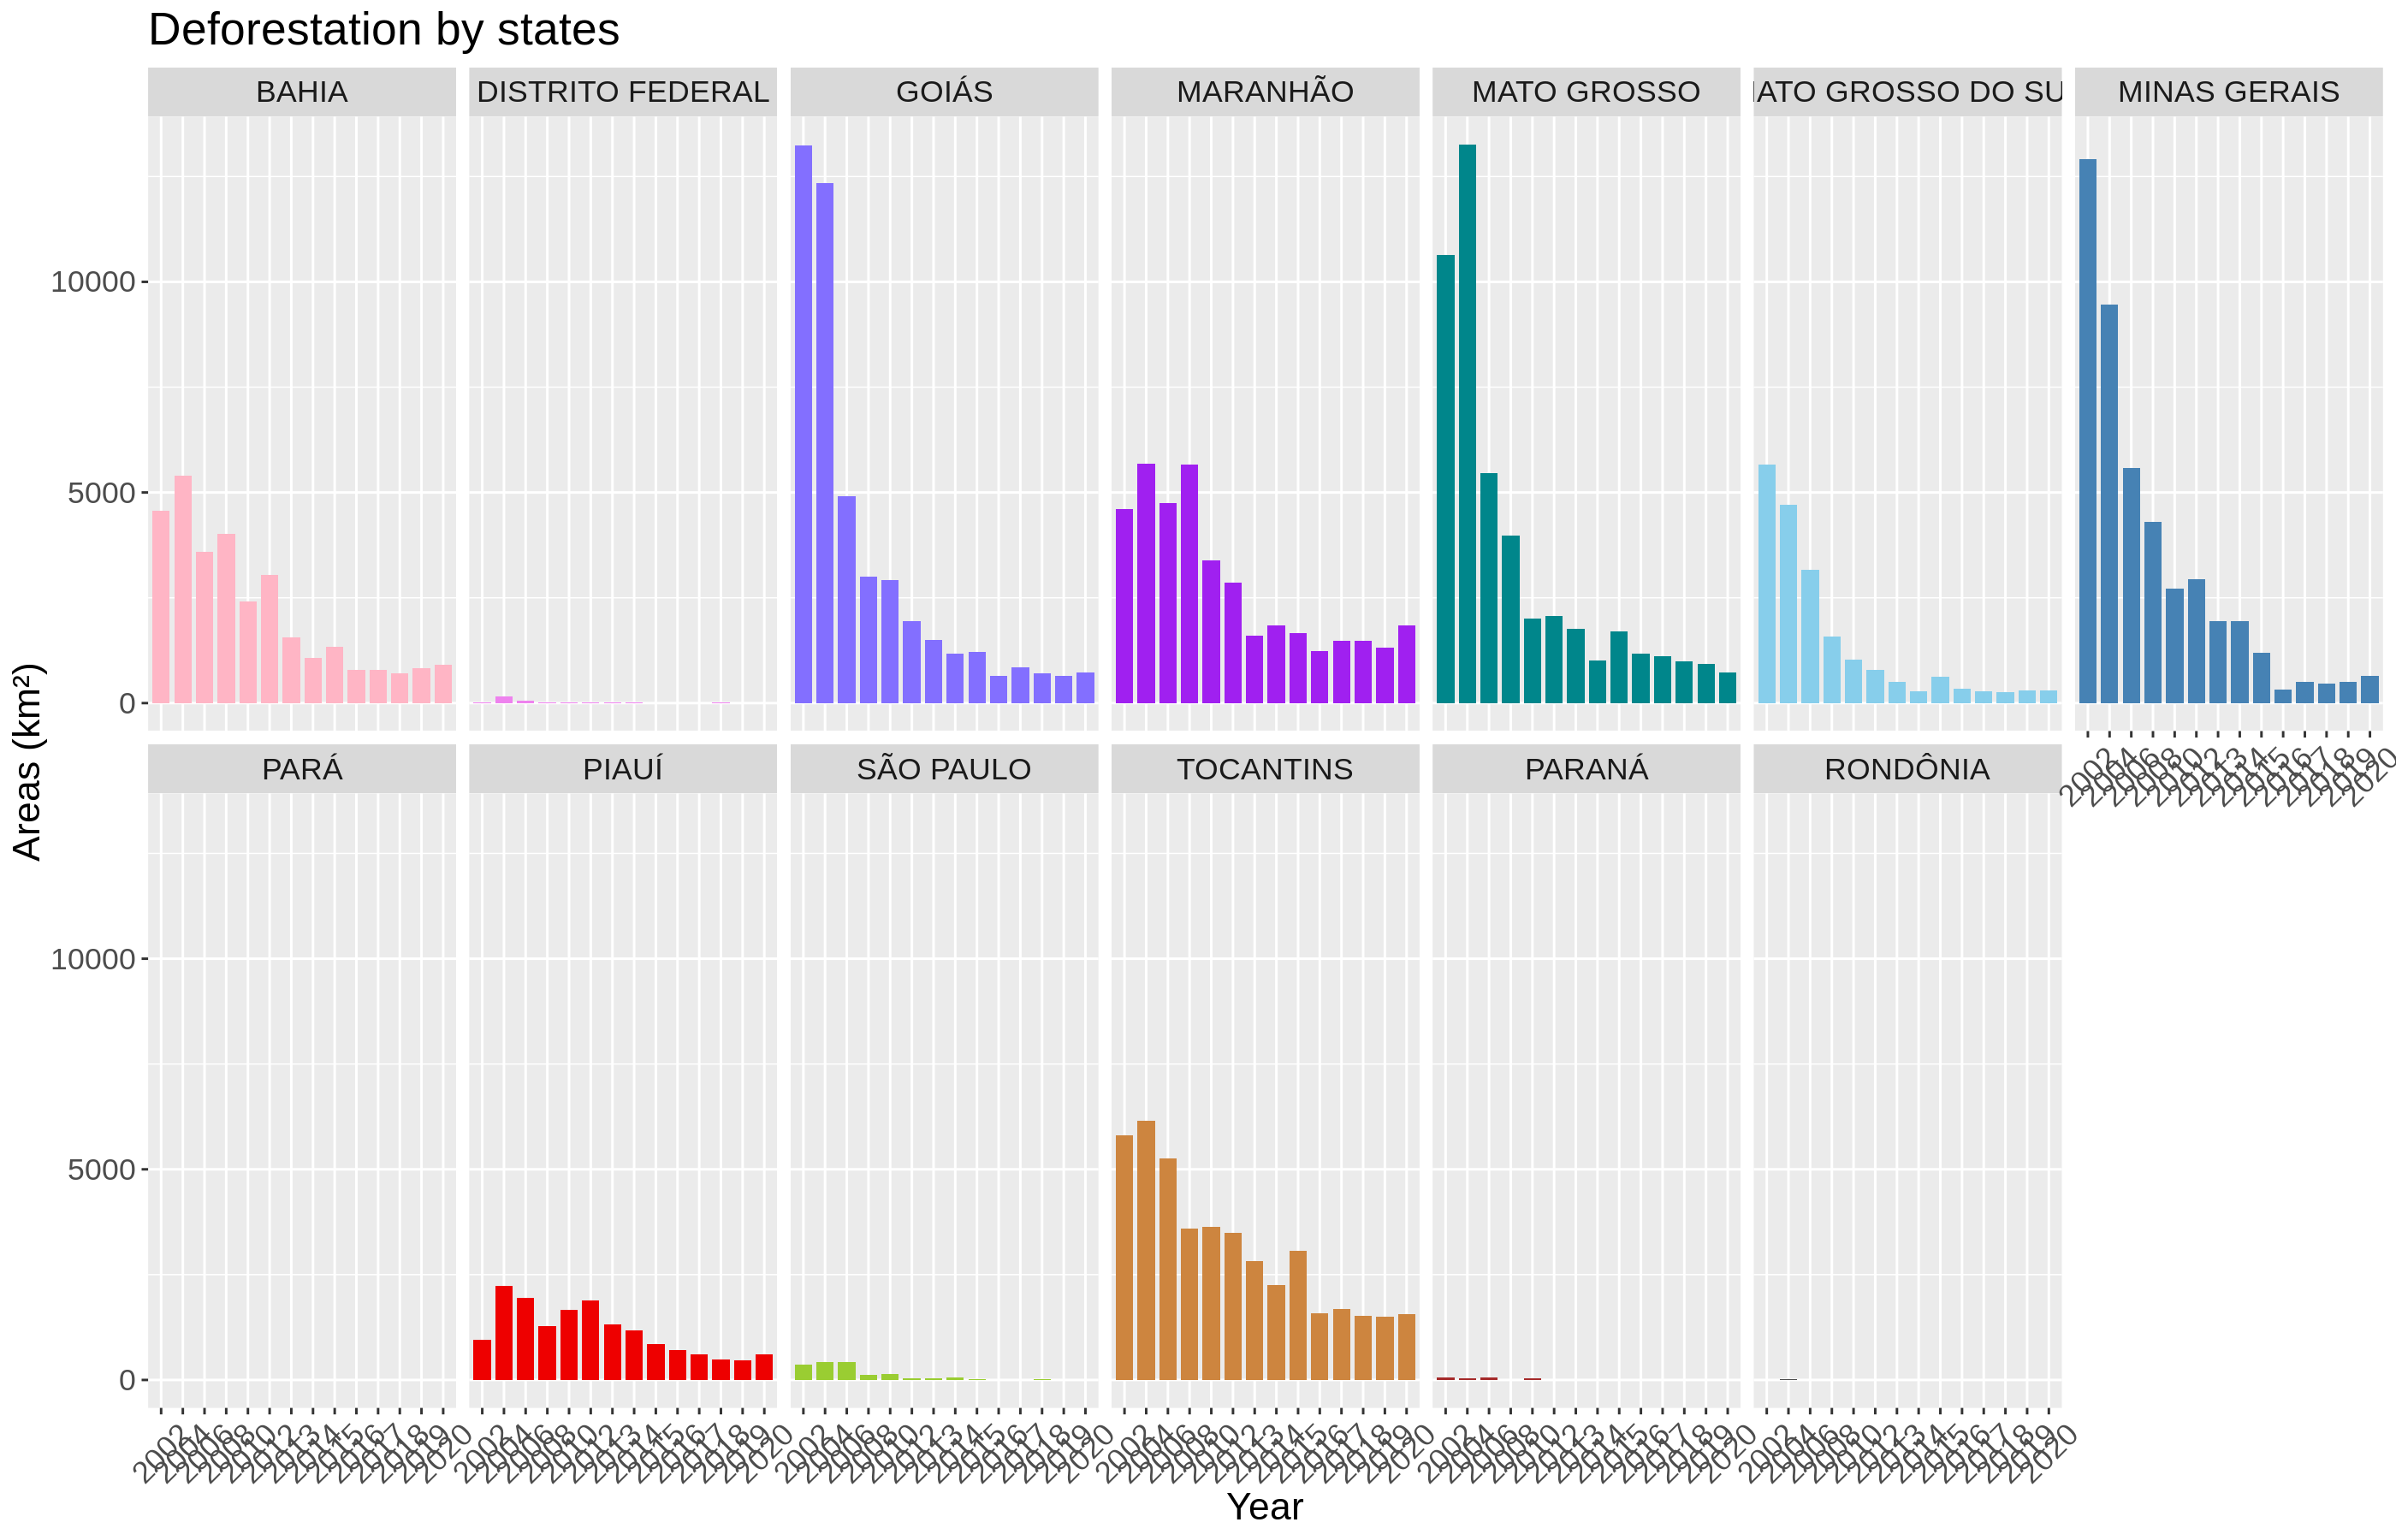

In [21]:
state_names <- c("1185" = "BAHIA", "1186" = "DISTRITO FEDERAL", "1187" = "GOIÁS", "1188" = "MARANHÃO",
                 "1189" = "MATO GROSSO", "1190" = "MATO GROSSO DO SUL", "1191" = "MINAS GERAIS", 
                 "1192" = "PARÁ", "1193" = "PIAUÍ", "1194" = "SÃO PAULO", "1195" = "TOCANTINS",
                 "1196" = "PARANÁ", "1197" = "RONDÔNIA")

# plot data set - With grid or wrap
ggplot(allStd, aes(x=as.factor(endDate.year), y=area, fill=factor(loiname))) + #
  geom_bar(stat = "identity", width = 0.8) + # , fill = "#008080"
  facet_wrap(loiname ~ ., ncol = 7, labeller = as_labeller(state_names)) +
  scale_x_discrete("Year", labels = as.character(allStd$endDate.year), 
                   breaks = allStd$endDate.year) +
  scale_fill_manual(values=myCol, labels = names(legendNames)) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16), legend.position="none") +
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") + 
  labs(title = "Deforestation by states") + labs(fill = "classes")

Shape of the deforestation areas in Cerrado municipalities (center point and variability)

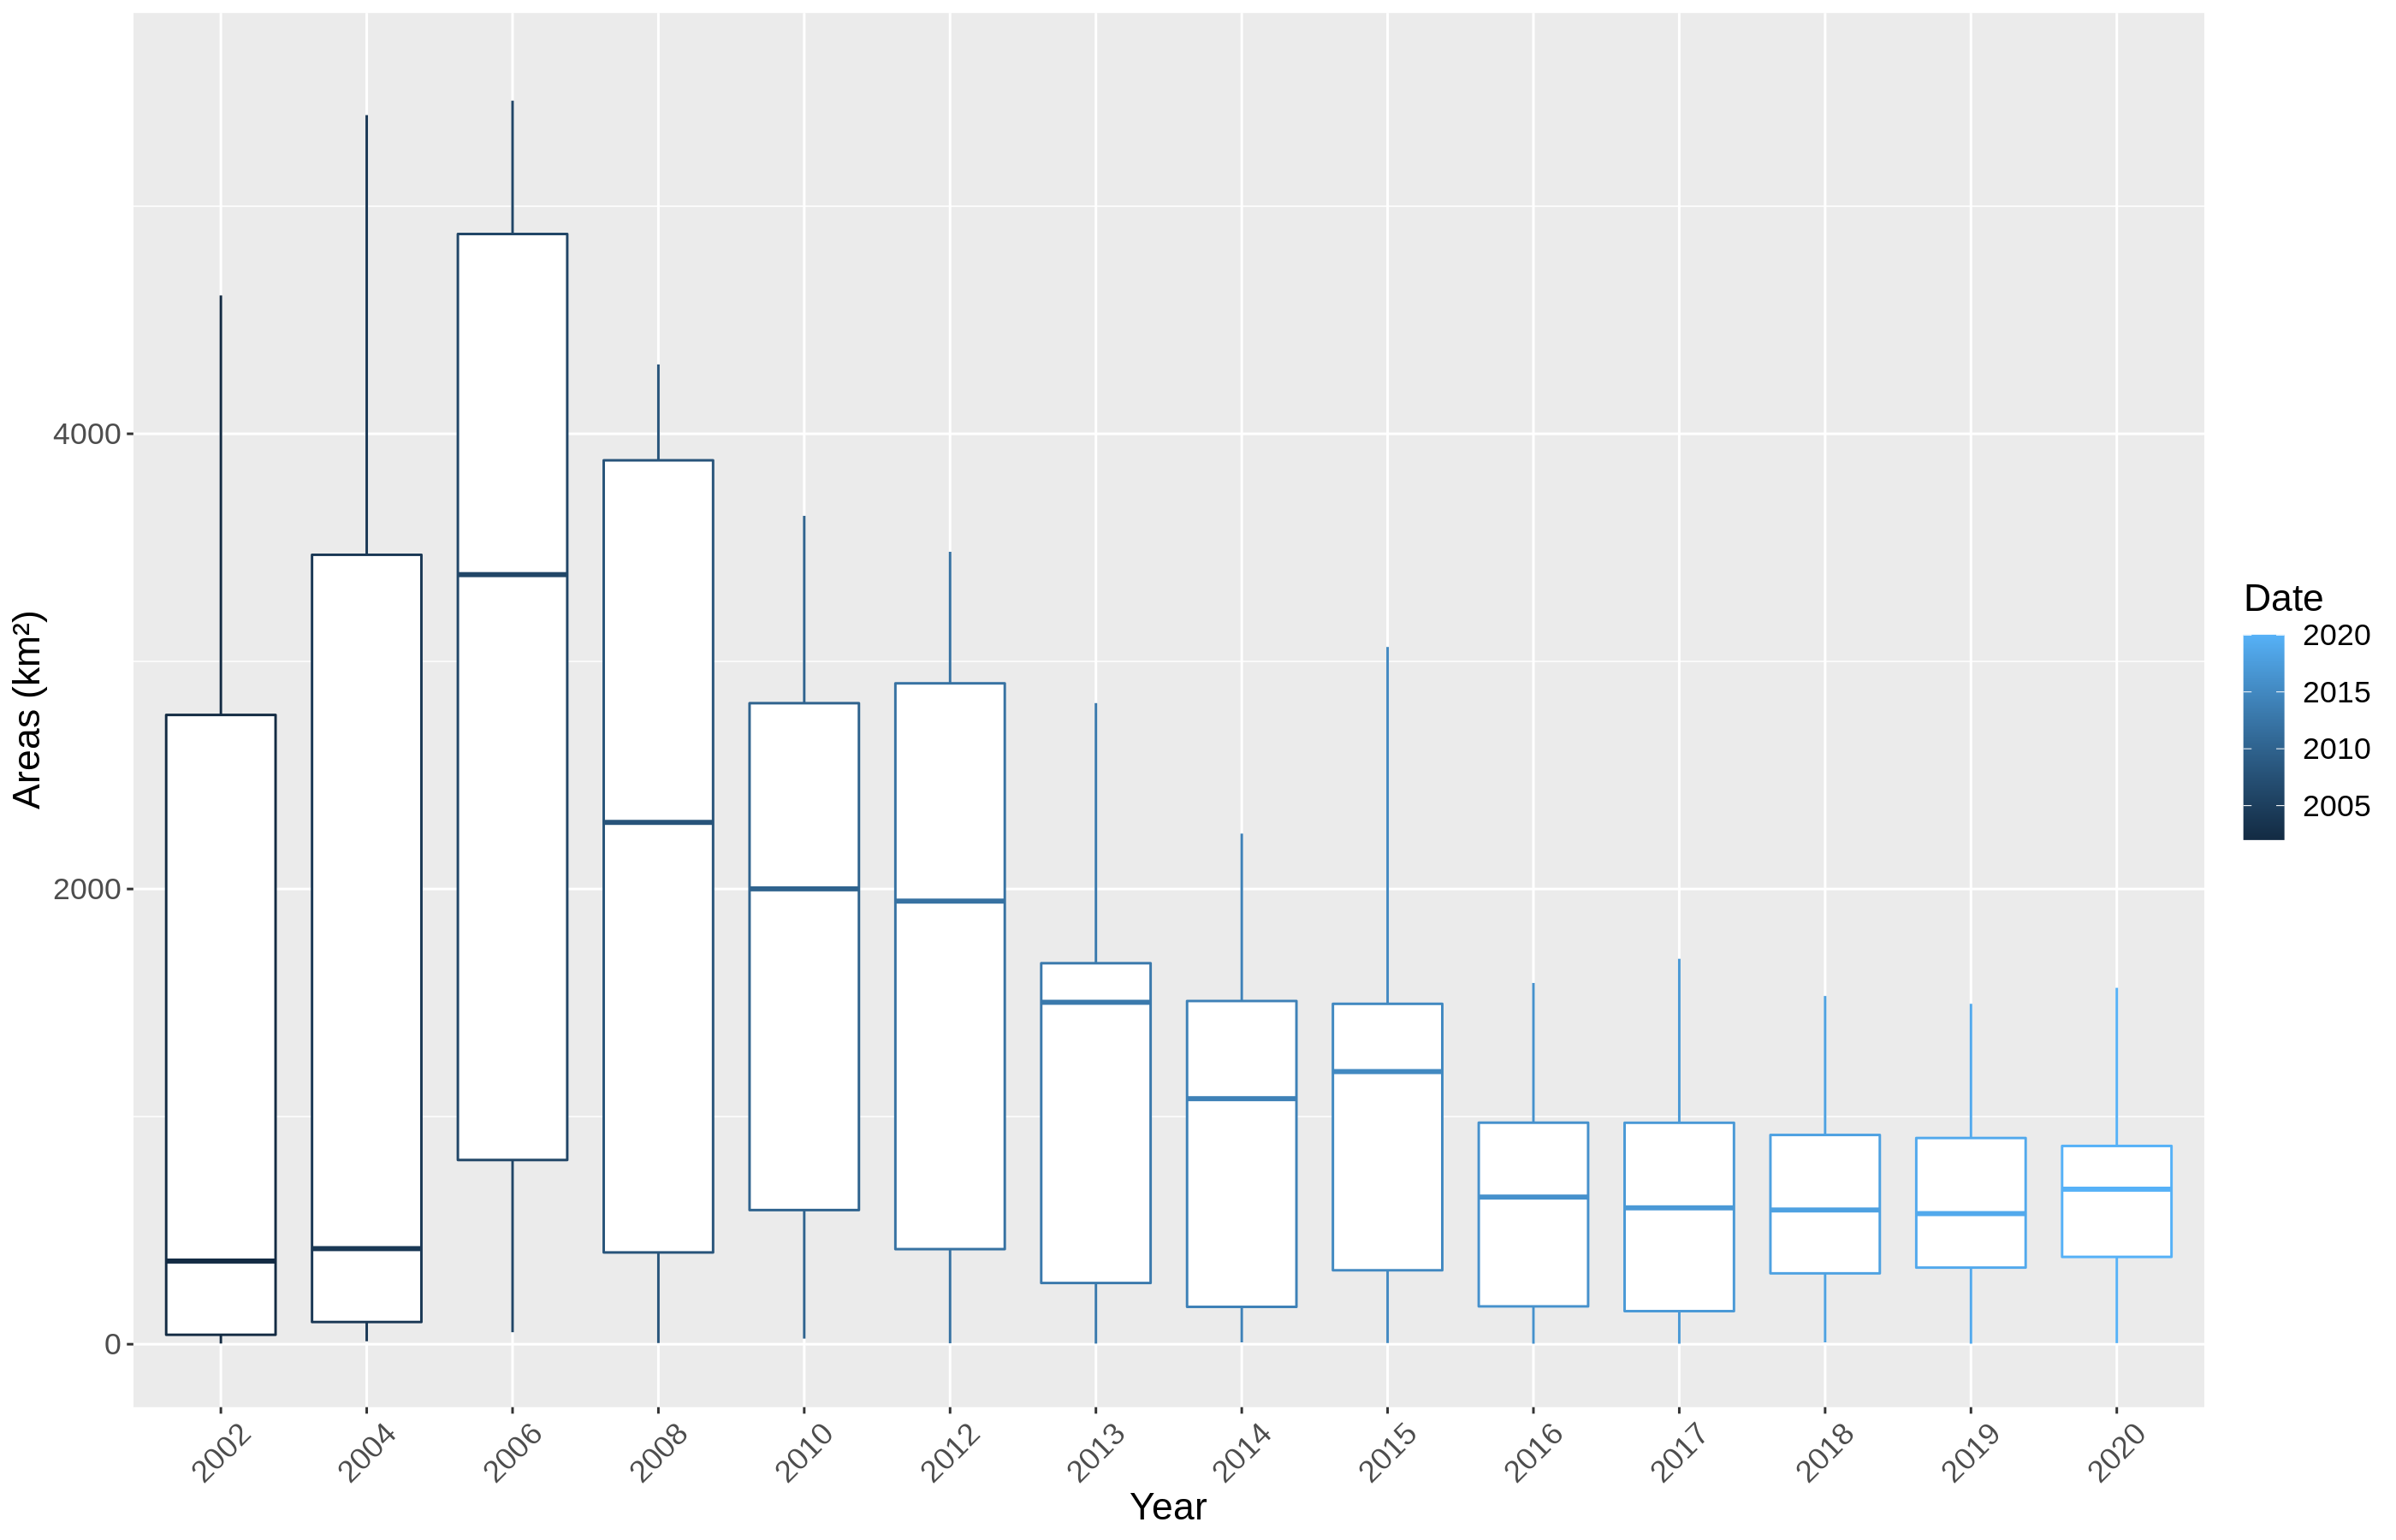

In [22]:
ggplot(allStd, aes(x=as.factor(endDate.year), y=area, color=endDate.year, group=endDate.year)) + 
  geom_boxplot(outlier.shape = NA) +
  scale_x_discrete("Year", labels = as.character(allStd$endDate.year), 
                   breaks = allStd$endDate.year) +
  scale_y_continuous(limits = quantile(all$area, c(0.1, 0.9))) +
  expand_limits(y=25) + 
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16))

## References

Assis, L. F. F. G. A.; Ferreira, K. R.; Vinhas, L.; Maurano, L.; Almeida, C. A., Nascimento, J. R., Carvalho, A. F. A.; Camargo, C.; Maciel, A. M. TerraBrasilis: A Spatial Data Infrastructure for Disseminating Deforestation Data from Brazil. In Proceeding of the XIX Remote Sensing Brazilian Symposium, 2019.

## Reporting Bugs

Any problem should be reported to terrabrasilis@inpe.br.